# Activity 6

* Download the Activity6 lab and upload it onto Google Colab.
* Answer the Activity6 questions in Canvas and populate the cells below
* Submit Activity6 questions on Canvas and upload the PDF version of this lab:
>* To submit the this lab as PDF, go to File, click Print, then save it as PDF instead of printing it

# Business Problem

Max Lunen is a Data Scientist at The College Board and has been tasked with building predictive models to predict student admission and academic performance. You have been hired as an Analyst to assist Max.

First, you will help Max evaluate the performance of a classification model predicting if a student will be accepted into a graduate program based on their profile and performance at the undergraduate level.

Then, you will use undergraduate performance and student profile information to predict student performance on the Graduate Record Examination (GRE), a standardized test required for entrance into graduate school programs.

An overview of the **CollegeData** dataset is below:

| Variable   |   Description |
| ----------- | ----------- |
| Student_ID | Unique student identification number|
| GRE Score | The GRE score of the student (possible scores range from 260-340)|
| TOEFL Score | The student's score on the TOEFL English language score|
| University Rating | The rating of the student's undergraduate university (ranging from 1-5)|
| SOP |The student's rating on the statement of purpose submission (ranging from 1-5)|
| LOR | The student's rating on their letter of recommendations (ranging from 1-5)|
| Research | Indicates if the student conducted research in their undergraduate program (1) or not (1)|
| CGPA | The college GPA of the student, on a 10-point scale|
| Admit | Indicates if the student was admitted to the graduate program (1) or not (1)|


# Import Packages

In [ ]:
# do not manipluate this cell - just run it

import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

set_config(transform_output = "pandas")

# Part 1: Predictive Modeling

## Data Import

In [ ]:
# do not manipluate this cell - just run it

data = pd.read_csv('https://raw.githubusercontent.com/CHill-MSU/INFO265_Data/refs/heads/main/CollegeData.csv', index_col = 0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,CGPA,Admit
Student_ID,,,,,,,,
1,337,118,4,4.5,4.5,1,9.65,1
2,324,107,4,4.0,4.5,1,8.87,1
3,316,104,3,3.0,3.5,1,8.00,1
4,322,110,3,3.5,2.5,1,8.67,1
5,314,103,2,2.0,3.0,0,8.21,1


In [ ]:
# do not manipluate this cell - just run it

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   Research           400 non-null    int64  
 6   CGPA               400 non-null    float64
 7   Admit              400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 28.1 KB


## Q1

* Run the code cell below to perform classification analysis and output the confusion matrix.
* Based on the output, the accuracy of the model is ______?
* Select the right answer from Canvas.

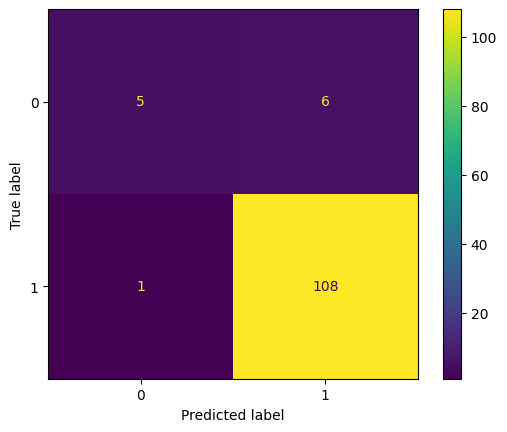

In [ ]:
# do not manipluate this cell - just run it

XA = data.drop('Admit', axis = 1)
yA = data['Admit']
train_XA, test_XA, train_yA, test_yA = train_test_split(XA, yA, test_size = 0.3, stratify = yA, random_state = 123)
rf = RandomForestClassifier(random_state = 123).fit(train_XA, train_yA)
predsA = rf.predict(X = test_XA)
ConfusionMatrixDisplay.from_predictions(test_yA, predsA)

## Q2

* No code needed.
* Select the right answer in Canvas.

## Q3

* No code needed.
* Select the right answer in Canvas.

## Q4

* No code needed.
* Select the right answer in Canvas.

## Q5

* No code needed.
* Select the right answer in Canvas.

# Part 2: Linear Regression

Next, you will use a student's TOEFL Score, University Rating, Research, and College GPA to predict their GRE Score.

In [ ]:
# do not manipluate this cell - just run it

X = data.drop(['Admit', 'GRE Score', 'LOR ', 'SOP'], axis = 1)
y = data['GRE Score']

## Q6

* Which of the following code lines should you use to split the data into training and testing sets using a 65/35 train/test split?
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.35, random_state = 123)

## Q7

* Which of the following code lines should you use to train a linear regression model to predict a student's GRE score?
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

## Q8

* Run the code cell below to output the fitted coefficients for you linear regression model.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

print('Intercept       ', lr.intercept_.round(2))
print(pd.DataFrame(lr.coef_.round(2), columns = ['Coefficients'], index = lr.feature_names_in_))

Intercept        158.92
                   Coefficients
TOEFL Score                0.79
University Rating         -0.23
Research                   3.56
CGPA                       8.32


## Q9

* No code needed.
* Select the right answer in Canvas.

## Q10

* Run the code cell below to output the regression performance measures for the model predicting a student's GRE.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

preds = lr.predict(X = test_X)
print("R2:", r2_score(test_y, preds))
print("MAE:", mean_absolute_error(test_y, preds))
print("RMSE:", root_mean_squared_error(test_y, preds))

R2: 0.7583101983085581
MAE: 4.3858420237755675
RMSE: 5.591911027598806
